In [1]:
%store -r pdict 

In [2]:
import pandas as pd
import numpy as np
from itertools import cycle

In [8]:
def preprocessing(pdict):
    #forming a dataframe
    df = pd.DataFrame(pdict).T 
    
    #forming a dataframe by mapping each image of a patient to its label and patient id
    def func(idx):
        return list(zip(cycle([idx]),df.loc[idx,'images'],cycle([df.loc[idx,'label']])))
    
    df_all = list(map(func,df.index))
    spreadlist = sum(df_all,[])
    new_df = pd.DataFrame(spreadlist,columns=['PatientID','Image','label'])
    
    #splitting that new dataframe into train and test
    total = len(new_df)
    total_idx = np.random.permutation(total)
    test = int(np.ceil(0.2*total))
    test_idx = total_idx[:test]
    train_idx = total_idx[test:]
    
    dftrain = new_df.iloc[train_idx]
    dftest = new_df.iloc[test_idx]
    
    return dftrain,dftest 

In [9]:
dftr,dfte = preprocessing(pdict)

#  Data Visualization

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

## Black Images

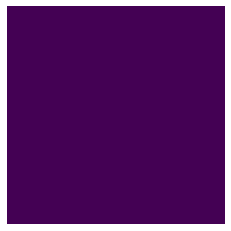

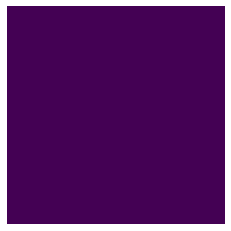

In [13]:
#print black images
count = 1
for i,image in enumerate(dftr['Image']):
    if np.max(image)==0:
        if count<3:
            plt.figure()
            plt.imshow(image)
            plt.axis('off')
        count += 1

## RGB scale images

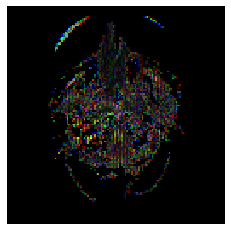

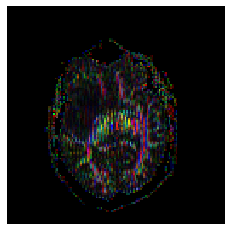

In [14]:
#print rgb images
count = 1
for i,image in enumerate(dftr['Image']):
    if len(image.shape)>2:
        if count<3:
            plt.figure()
            plt.imshow(image)
            plt.axis('off')
        count +=1 

## Normal Images

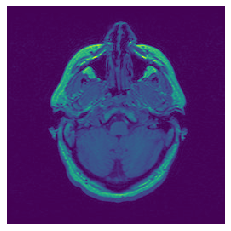

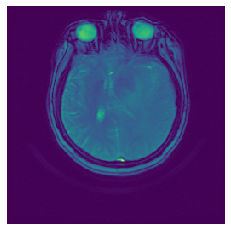

In [15]:
# print normal scanned images
count = 1
for i,image in enumerate(dftr['Image']):
    if len(image.shape)<=2 and np.max(image)!=0:
        if count<3:
            plt.figure()
            plt.imshow(image)
            plt.axis('off')
        count +=1 

In [26]:
np.mean([len(pdict[list(pdict.keys())[i]]['images']) for i in range(len(pdict.keys()))])

27.67005076142132

In [16]:
file_name = "train_csv.pkl"
dftr.to_pickle(file_name)

In [17]:
mydf = pd.read_pickle('train_csv.pkl')

In [18]:
mydf.head()

,PatientID,Image,label
3272,TCGA-HT-7485,"[[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,...",Alive
3865,TCGA-HT-7689,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Alive
3651,TCGA-HT-7677,"[[1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0,...",Alive
952,TCGA-DU-6400,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Dead
2108,TCGA-DU-A6S2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Alive


In [19]:
file_name_test = "test_data.pkl"
dfte.to_pickle(file_name_test)